### Classification project for logistic regression:

Classifying with supervised learning whether diabetic patients are readmitted, and if they are, if it's before or after 30 days.

Using the dataset from here: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [1]:
import pandas as pd
import patsy as patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pickle

In [2]:
with open("x_liv.pkl", 'rb') as picklefile: 
    x_liv = pickle.load(picklefile)

with open("y_liv.pkl", 'rb') as picklefile: 
    y_liv = pickle.load(picklefile)

In [3]:
with open("y_train_liv.pkl", 'rb') as picklefile: 
    y_train_liv = pickle.load(picklefile)

with open("y_test_liv.pkl", 'rb') as picklefile: 
    y_test_liv = pickle.load(picklefile)

with open("x_train_liv.pkl", 'rb') as picklefile: 
    x_train_liv = pickle.load(picklefile)

with open("x_test_liv.pkl", 'rb') as picklefile: 
    x_test_liv = pickle.load(picklefile)

with open("x_train_scaled_liv.pkl", 'rb') as picklefile: 
    x_train_scaled_liv = pickle.load(picklefile)

with open("x_test_scaled_liv.pkl", 'rb') as picklefile: 
    x_test_scaled_liv = pickle.load(picklefile)
    
with open("x_scaled_liv.pkl", 'rb') as picklefile: 
    x_scaled_liv = pickle.load(picklefile)

with open("patientdataICD9_liv.pkl", 'rb') as picklefile: 
    patientdataICD9_liv = pickle.load(picklefile)

In [4]:
# using the scaled x-train and x-test because it's Logistic
x_train = x_train_scaled_liv
y_train = y_train_liv
x_test = x_test_scaled_liv
y_test = y_test_liv
x = x_scaled_liv
y = y_liv

#### Logistic regression without test/train split:

In [3]:
lrmodel = linear_model.LogisticRegression()
lrmodel.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
lrmodel.score(x,y)

0.6008883124029637

#### Logistic regression with test/train split (25% for test):

In [7]:
# stratifying the test-train split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [8]:
lrmodel = linear_model.LogisticRegression()
lrmodel.fit(x_train,y_train)
#lrmodel.score(x_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# This code achieves the same thing as lrmodel.score(x_test,y_test)

# Predict on test
y_pred = lrmodel.predict(x_test)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.576
             precision    recall  f1-score   support

        <30       0.39      0.01      0.03      2839
        >30       0.51      0.33      0.40      8887
         NO       0.60      0.86      0.71     13303

avg / total       0.54      0.58      0.52     25029



#### Logistic regression with cross-validation:

In [11]:
# 10-fold cross-validation with logistic regression
# stratifying the Kfold splits is default in CV
# returning the average score
print(cross_val_score(lrmodel, x, y, cv=10, scoring='accuracy').mean())

0.5785042253401416


In [19]:
y_test.unique()

array(['<30', '>30', 'NO'], dtype=object)

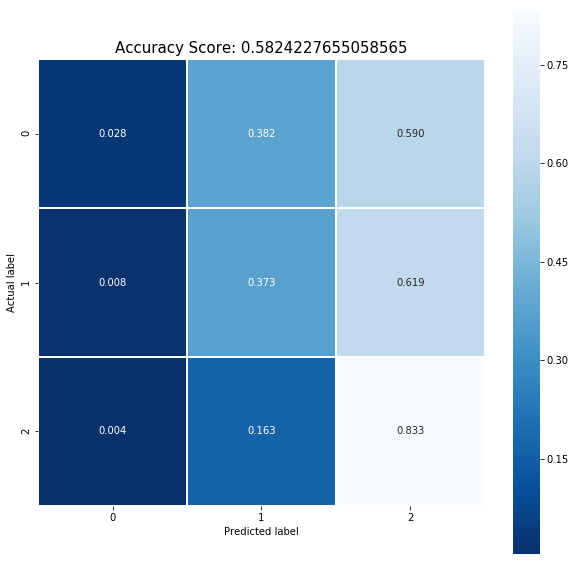

In [26]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=list(y_test.unique()))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [25]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[0.0278267 , 0.38182459, 0.59034871],
       [0.00787667, 0.37312929, 0.61899404],
       [0.00415573, 0.16302129, 0.83282298]])

In [53]:
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.582
             precision    recall  f1-score   support

        <30       0.38      0.03      0.05      2839
        >30       0.50      0.37      0.43      8887
         NO       0.61      0.83      0.71     13716

avg / total       0.55      0.58      0.54     25442



In [42]:
lrmodel.coef_.shape

(3, 2467)

#### Get the coefficients:

In [45]:
coefficients = pd.DataFrame({"Feature":x.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

In [48]:
coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

In [52]:
coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Coefficients,Feature,abs_val_coef
48,-3.963645,discharge_disposition_id[T.Expired],3.963645
1650,1.724912,diag_3[T.156],1.724912
378,1.692176,diag_1[T.358],1.692176
733,1.674245,diag_1[T.82],1.674245
679,1.575255,diag_1[T.731],1.575255
45,1.472298,discharge_disposition_id[T.Discharged/transfer...,1.472298
51,-1.461185,discharge_disposition_id[T.Hospice / home],1.461185
376,1.461155,diag_1[T.356],1.461155
2405,1.455284,diag_3[T.V60],1.455284
960,1.436297,diag_2[T.250.1],1.436297


#### Grid search Logistic Regression:

In [31]:
# list(np.arange(0.0, 10.0, 0.1))

In [34]:
# define the parameter values that should be searched
C_range = list(np.arange(0.1, 1.0, 0.1))

# Logistic regression defaults to L2 normalization

# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(C=C_range)

# instantiate the grid
grid = GridSearchCV(lrmodel, param_grid, cv=10, scoring='accuracy')

In [35]:
# fit the grid with data 
grid.fit(x, y);

In [36]:
# view the complete results (list of named tuples)
grid.grid_scores_

/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.58122, std: 0.00805, params: {'C': 0.1},
 mean: 0.58068, std: 0.00763, params: {'C': 0.2},
 mean: 0.58014, std: 0.00771, params: {'C': 0.30000000000000004},
 mean: 0.57977, std: 0.00773, params: {'C': 0.4},
 mean: 0.57966, std: 0.00781, params: {'C': 0.5},
 mean: 0.57959, std: 0.00792, params: {'C': 0.6},
 mean: 0.57942, std: 0.00780, params: {'C': 0.7000000000000001},
 mean: 0.57903, std: 0.00786, params: {'C': 0.8},
 mean: 0.57871, std: 0.00776, params: {'C': 0.9}]

In [37]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5812157302045869
{'C': 0.1}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


#### Using GridSearchCV, I found that a lower C than default performs better, but trivially so
0.581 for C=0.1 vs 0.578 for C=1

#### Random undersampling:

In [10]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

In [11]:
lrmodel.fit(x_train_undersampled, y_train_undersampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# Predict on test
y_pred = lrmodel.predict(x_test)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.490
             precision    recall  f1-score   support

        <30       0.20      0.43      0.27      2839
        >30       0.45      0.37      0.41      8887
         NO       0.66      0.58      0.62     13303

avg / total       0.53      0.49      0.50     25029



In [74]:
# define the parameter values that should be searched
C_range = list(np.arange(0.1, 1.0, 0.1))

# Logistic regression defaults to L2 normalization

# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(C=C_range)

# instantiate the grid
grid = GridSearchCV(lrmodel, param_grid, cv=3, scoring='recall_micro')

In [75]:
x_scaled_undersampled, y_undersampled = rus.fit_sample(x_scaled, y)

In [76]:
# fit the grid with data 
grid.fit(x_scaled_undersampled, y_undersampled);

In [77]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.3827301810924246
{'C': 0.1}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [22]:
lrmodel = linear_model.LogisticRegression(C=0.1)
lrmodel.fit(x_train_undersampled, y_train_undersampled)
# Predict on test
y_pred = lrmodel.predict(x_test)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.495
             precision    recall  f1-score   support

        <30       0.20      0.44      0.28      2839
        >30       0.45      0.38      0.41      8887
         NO       0.68      0.58      0.62     13716

avg / total       0.55      0.50      0.51     25442



#### Get the coefficients:

In [26]:
coefficients = pd.DataFrame({"Feature":x.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

In [27]:
coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

In [28]:
coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Coefficients,Feature,abs_val_coef
48,-1.926929,discharge_disposition_id[T.Expired],1.926929
40,1.099186,discharge_disposition_id[T.Discharged/transfer...,1.099186
51,-0.731982,discharge_disposition_id[T.Hospice / home],0.731982
42,0.675508,discharge_disposition_id[T.Discharged/transfer...,0.675508
36,0.632479,discharge_disposition_id[T.Discharged/transfer...,0.632479
105,0.610922,medical_specialty[T.Hematology],0.610922
37,-0.509578,discharge_disposition_id[T.Discharged/transfer...,0.509578
45,0.493708,discharge_disposition_id[T.Discharged/transfer...,0.493708
151,-0.411070,medical_specialty[T.Surgery-Cardiovascular/Tho...,0.411070
181,-0.410666,"diag_2[T.Complications Of Pregnancy, Childbirt...",0.410666


In [63]:
# define the parameter values that should be searched
C_range = list(np.arange(0.1, 1.0, 0.1))

# Logistic regression defaults to L2 normalization

# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(C=C_range)

# instantiate the grid
grid = GridSearchCV(lrmodel, param_grid, cv=10, scoring='accuracy')

In [ ]:
# fit the grid with data 
grid.fit(x_scaled, y);

In [ ]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [7]:
poly = preprocessing.PolynomialFeatures(2, interaction_only=True)
x_train_poly_undersampled = poly.fit_transform(x_train_undersampled)

In [8]:
x_train_poly_undersampled.shape

(25554, 36316)

In [10]:
x_test_poly_undersampled = poly.transform(x_test)

In [19]:
lrmodel = linear_model.LogisticRegression(C=0.01)

lrmodel.fit(x_train_poly_undersampled, y_train_undersampled)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# Predict on test
y_pred = lrmodel.predict(x_test_poly_undersampled)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.461
             precision    recall  f1-score   support

        <30       0.18      0.44      0.25      2839
        >30       0.43      0.39      0.41      8887
         NO       0.68      0.51      0.58     13716

avg / total       0.53      0.46      0.49     25442



In [17]:
storelrmodel = lrmodel

#### Get the coefficients:

In [14]:
coefficients = pd.DataFrame({"Feature":x_test_poly_undersampled.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [15]:
coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

NameError: name 'coefficients' is not defined

In [52]:
coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Coefficients,Feature,abs_val_coef
48,-3.963645,discharge_disposition_id[T.Expired],3.963645
1650,1.724912,diag_3[T.156],1.724912
378,1.692176,diag_1[T.358],1.692176
733,1.674245,diag_1[T.82],1.674245
679,1.575255,diag_1[T.731],1.575255
45,1.472298,discharge_disposition_id[T.Discharged/transfer...,1.472298
51,-1.461185,discharge_disposition_id[T.Hospice / home],1.461185
376,1.461155,diag_1[T.356],1.461155
2405,1.455284,diag_3[T.V60],1.455284
960,1.436297,diag_2[T.250.1],1.436297


#### Logistic with SMOTE:

In [5]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

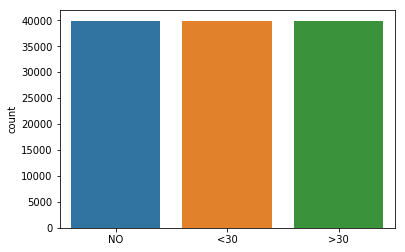

In [6]:
sns.countplot(y_train_smote)

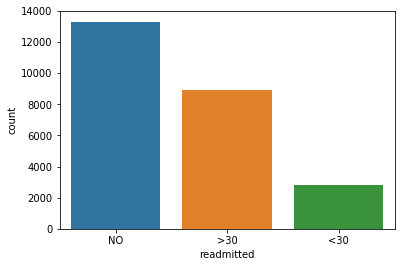

In [7]:
sns.countplot(y_test)

In [8]:
lrmodel = linear_model.LogisticRegression(C=1)
lrmodel.fit(x_train_smote, y_train_smote)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# Predict on test
y_pred = lrmodel.predict(x_test)

In [10]:
# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

# recall @ C = 0.1: ?, ?, ?

Accuracy: 0.483
             precision    recall  f1-score   support

        <30       0.19      0.43      0.27      2839
        >30       0.46      0.37      0.41      8887
         NO       0.66      0.57      0.61     13303

avg / total       0.54      0.48      0.50     25029



In [11]:
#### Get the coefficients:

coefficients = pd.DataFrame({"Feature":x.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Coefficients,Feature,abs_val_coef
101,-2.060260,medical_specialty[T.Gynecology],2.060260
178,-2.050056,"diag_2[T.Complications Of Pregnancy, Childbirt...",2.050056
48,-1.846629,discharge_disposition_id[T.Hospice / home],1.846629
125,-1.769649,medical_specialty[T.Pediatrics-Endocrinology],1.769649
197,-1.638779,"diag_3[T.Complications Of Pregnancy, Childbirt...",1.638779
118,-1.578982,medical_specialty[T.Otolaryngology],1.578982
88,1.576654,medical_specialty[T.AllergyandImmunology],1.576654
45,1.548347,discharge_disposition_id[T.Discharged/transfer...,1.548347
31,-1.468207,admission_type_id[T.Trauma Center],1.468207
242,-1.440867,acarbose[T.Steady],1.440867


In [ ]:
plot(coefficients.Coefficients, coefficients.Feature)